# Projet du Cours : Méthodes numériques probabilistes avancées en finance - M2MO 2021-2022

## Projet 2 : Méthode de Machine Learning pour les EDSRs

- Nom et prénom: **UTH Rathea**

- NumeroEtudiant: **22106760**

- Nom et prénom: **Nouredine Larbi**

- NumeroEtudiant: **22118105**

### Importing libraries

In [409]:
import logging
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

In [410]:
logging.basicConfig(format='%(asctime)s - %(levelname)s - %(message)s', level=logging.INFO)

### Test on the fifth result of Nonlinear Black-Scholes Equation with Default Risk 

In [411]:
data = pd.read_csv("logs/pricing_default_risk_d100_result5.csv")
data.shape

(61, 4)

In [412]:
data.head()

,step,loss_function,target_value,elapsed_time
0,0,152.9920,45.5438,0
1,100,134.3390,46.3317,28
2,200,118.5410,47.0730,34
3,300,105.2000,47.7750,41
4,400,93.7982,48.4418,48


In [413]:
data.tail()

,step,loss_function,target_value,elapsed_time
56,5600,26.0277,57.0334,427
57,5700,25.9709,57.0908,437
58,5800,25.9224,57.0591,447
59,5900,26.0108,57.0326,454
60,6000,25.9768,57.0207,462


In [493]:
# total execution time for 1 run (in seconds)
sum(data.elapsed_time)

14133

# Example 1 :

### Results of Nonlinear Black-Scholes Equation with Default Risk with 5 tests independent

In [415]:
def create_dataset(filename):
    path = "logs/"
    list_files = sorted(glob.glob(path + filename))

    df = []
    for file in list_files:
        read_f = pd.read_csv(file)
        read_f = read_f.drop(['loss_function', 'elapsed_time'], axis=1)
        df.append(read_f)
    
    col = ["step"]
    data = pd.DataFrame(columns = col)

    for file in df:
        data = data.merge(file, on=['step'], how='outer', suffixes=('_x', '_y'))

    data.columns = ['step','target_value_1', 'target_value_2',
              'target_value_3', 'target_value_4', 'target_value_5']

    data['target_value_mean'] = data.loc[: , data.columns != 'step'].mean(axis=1)
    data['target_value_sd'] = data.loc[: , data.columns != 'step'].std(axis=1)

    return data

In [416]:
def total_time_execution_last(filename):
    path = "logs/"
    list_files = sorted(glob.glob(path + filename))

    res = []
    for file in list_files:
        read_f = pd.read_csv(file)
        size = read_f.shape[0]
        tmp = read_f["elapsed_time"].iloc[size-1]
        res.append(tmp)
        
    return sum(res)

In [418]:
BS_data = create_dataset(filename="pricing_default_risk_d100_result*.csv")
BS_data.shape

(61, 8)

In [419]:
BS_data.head()

,step,target_value_1,target_value_2,target_value_3,target_value_4,target_value_5,target_value_mean,target_value_sd
0,0,45.4378,46.7497,42.7574,47.6805,45.5438,45.63384,1.658578
1,100,46.2225,47.5327,43.5506,48.4612,46.3317,46.41974,1.654380
2,200,46.9637,48.2700,44.3206,49.1991,47.0730,47.16528,1.643057
3,300,47.6667,48.9734,45.0594,49.8852,47.7750,47.87194,1.626550
4,400,48.3413,49.6289,45.7751,50.5267,48.4418,48.54276,1.601652


In [420]:
BS_data.tail()

,step,target_value_1,target_value_2,target_value_3,target_value_4,target_value_5,target_value_mean,target_value_sd
56,5600,57.0472,57.0104,57.0320,56.9826,57.0334,57.02112,0.022575
57,5700,57.0569,57.0319,57.0128,56.9839,57.0908,57.03526,0.036624
58,5800,57.0408,57.0521,56.9623,56.9521,57.0591,57.01328,0.046273
59,5900,57.0038,57.0217,56.9912,56.9694,57.0326,57.00374,0.022325
60,6000,57.0187,57.0498,57.0265,57.0349,57.0207,57.03012,0.011335


In [421]:
# fonction to calculate the approximation of relative error
def relative_error_estimate(data, size):
    v_a = data["target_value_mean"].iloc[size-1]
    v_e = data["target_value_mean"].mean()
    return abs(v_a - v_e)/v_e

In [422]:
relative_error_estimate(BS_data, size = BS_data.shape[0])

0.03746831435830592

In [423]:
# fonction to calculate the approximation of relative error in the article using means of the multilevel Picard method
def relative_error_exact(data, size):
    v_a = data["target_value_mean"].iloc[size-1]
    v_e = 57.300 # by using means of the multilevel Picard method, given in article
    return abs(v_a - v_e)/v_e

In [424]:
relative_error_exact(BS_data, size = BS_data.shape[0])

0.004709947643979068

In [425]:
# Plot the mean and +- sd.
def plot_mean_std(data, ylabel="$u(t=0, x=(100,...,100))$", color1="r", color2="lightsalmon"):
    plt.figure(figsize=(9,6))
    xmin, xmax = plt.xlim()
    x = data['step']
    y = data['target_value_mean']
    error = data['target_value_sd']
    plt.plot(x, y, linewidth=2.5, color=color1)
    plt.fill_between(x, y-error, y+error, color=color2)
    plt.xlabel('Number of iteration steps')
    plt.ylabel(ylabel)

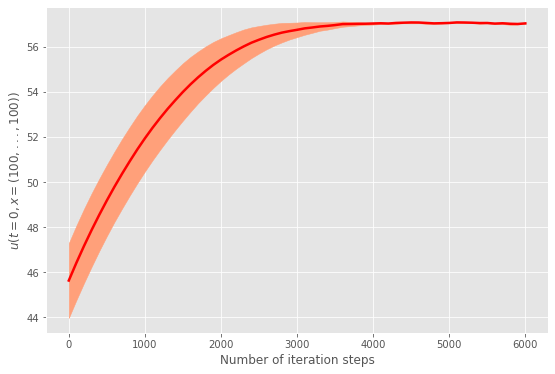

In [426]:
plot_mean_std(BS_data)

In [428]:
# total execution time for 5 runs (in seconds)
t = total_time_execution_last(filename="pricing_default_risk_d100_result*.csv")
print("Total execution time for 5 runs (last row) is : {}s".format(t))

Total execution time for 5 runs (last row) is : 2454s


### Study the relative error of 5 different runs of BS default risk

In [429]:
v_exact = 57.300 # by using means of the multilevel Picard method, given in article

def create_dataset_relative_error(filename, v_exact):
    
    def relative_error(v_a, v_e):
        return abs(v_a - v_e)/v_e
    
    def relative_error_df(df):
        res = []
        for i in range(df.shape[0]):
            res.append(relative_error(df["target_value"].iloc[i], v_exact))
            
        return res

    path = "logs/"
    list_files = sorted(glob.glob(path + filename))

    df = []
    for file in list_files:
        read_f = pd.read_csv(file)
        read_f["relative_error"] = relative_error_df(read_f)
        read_f = read_f.drop(['target_value', 'loss_function', 'elapsed_time'], axis=1)
        df.append(read_f)
    
    col = ["step"]
    data = pd.DataFrame(columns = col)

    for file in df:
        data = data.merge(file, on=['step'], how='outer', suffixes=('_x', '_y'))

    data.columns = ['step','relative_error_1', 'relative_error_2',
              'relative_error_3', 'relative_error_4', 'relative_error_5']

    data['relative_error_mean'] = data.loc[: , data.columns != 'step'].mean(axis=1)
    data['relative_error_sd'] = data.loc[: , data.columns != 'step'].std(axis=1)

    return data

In [431]:
BS_relative_error_df = create_dataset_relative_error(filename="pricing_default_risk_d100_result*.csv", v_exact=v_exact)
BS_relative_error_df.shape

(61, 8)

In [432]:
BS_relative_error_df.head()

,step,relative_error_1,relative_error_2,relative_error_3,relative_error_4,relative_error_5,relative_error_mean,relative_error_sd
0,0,0.207019,0.184124,0.253798,0.167880,0.205169,0.203598,0.028946
1,100,0.193325,0.170459,0.239955,0.154255,0.191419,0.189882,0.028872
2,200,0.180389,0.157592,0.226517,0.141377,0.178482,0.176871,0.028675
3,300,0.168120,0.145316,0.213623,0.129403,0.166230,0.164539,0.028387
4,400,0.156347,0.133876,0.201133,0.118208,0.154593,0.152831,0.027952


In [433]:
BS_relative_error_df.tail()

,step,relative_error_1,relative_error_2,relative_error_3,relative_error_4,relative_error_5,relative_error_mean,relative_error_sd
56,5600,0.004412,0.005054,0.004677,0.005539,0.004653,0.004867,0.000394
57,5700,0.004243,0.004679,0.005012,0.005517,0.003651,0.004620,0.000639
58,5800,0.004524,0.004326,0.005894,0.006072,0.004204,0.005004,0.000808
59,5900,0.005169,0.004857,0.005389,0.005770,0.004667,0.005170,0.000390
60,6000,0.004909,0.004366,0.004773,0.004627,0.004874,0.004710,0.000198


In [434]:
# Plot the mean and +- sd of relative error
def plot_RE_mean_std(data, ylabel="$u(t=0, x=(100,...,100))$", color1="r", color2="lightsalmon"):
    plt.figure(figsize=(9,6))
    xmin, xmax = plt.xlim()
    x = data['step']
    y = data['relative_error_mean']
    error = data['relative_error_sd']
    plt.plot(x, y, linewidth=2.5, color=color1)
    plt.fill_between(x, y-error, y+error, color=color2)
    plt.xlabel('Number of iteration steps')
    plt.ylabel(ylabel)

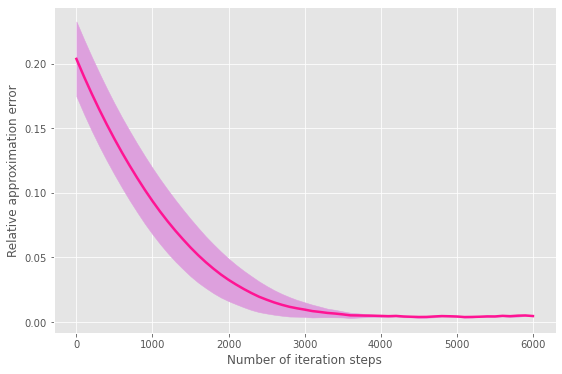

In [435]:
plot_RE_mean_std(BS_relative_error_df, ylabel="Relative approximation error", color1="deeppink", color2="plum")

# Example 2 :

### Results of Hamilton-Jacobi-Bellman (HJB) Equation with 5 tests independent

In [437]:
HJB_data = create_dataset(filename="hjb_lq_d100_result*.csv")
HJB_data.shape

(21, 8)

In [438]:
HJB_data.head()

,step,target_value_1,target_value_2,target_value_3,target_value_4,target_value_5,target_value_mean,target_value_sd
0,0,0.04498,0.097884,0.707535,0.993852,0.808437,0.530538,0.386309
1,100,0.99706,1.050820,1.653650,1.936140,1.755630,1.478660,0.382520
2,200,1.75448,1.802980,2.399660,2.669020,2.504370,2.226102,0.375551
3,300,2.21585,2.261640,2.879600,3.154740,3.008210,2.704008,0.390005
4,400,2.55972,2.602840,3.241740,3.539380,3.387090,3.066154,0.407163


In [439]:
HJB_data.tail()

,step,target_value_1,target_value_2,target_value_3,target_value_4,target_value_5,target_value_mean,target_value_sd
16,1600,4.59877,4.59954,4.59929,4.59970,4.59816,4.599092,0.000562
17,1700,4.60014,4.60189,4.59842,4.60222,4.59901,4.600336,0.001512
18,1800,4.60077,4.60078,4.60132,4.59919,4.59862,4.600136,0.001040
19,1900,4.59952,4.59888,4.60020,4.60032,4.59936,4.599656,0.000538
20,2000,4.60047,4.59997,4.60051,4.60225,4.59599,4.599838,0.002073


In [440]:
# Compute HJB by Monte-Carlo method

def g(x):
    return np.log((1 + np.linalg.norm(x)**2)/2)

def MC_HJB(lamb, size=10000):
    res = []
    for i in range(size):
        W = np.random.normal(0,1,100)
        res.append(np.exp(-lamb*g(np.sqrt(2)*(W))))
    return (-1/lamb) * np.log(np.mean(res))

def exact_sol_HJB(lamb, size=10000):
    res = []
    for i in range(100):
        res.append(MC_HJB(lamb, size))
        
    return sum(res)/len(res)

In [441]:
exact_sol_HJB(lamb=1, size=10000)

4.589810245657772

In [442]:
# fonction to calculate the approximation of relative error in the article using Monte-Carlo method
def relative_error_exact_HJB(data, size):
    v_a = data["target_value_mean"].iloc[size-1]
    v_e = exact_sol_HJB(lamb=1, size=10000) # by using Monte-Carlo method 
    return abs(v_a - v_e)/v_e

In [443]:
relative_error_exact_HJB(HJB_data, size = HJB_data.shape[0])

0.002107885832006639

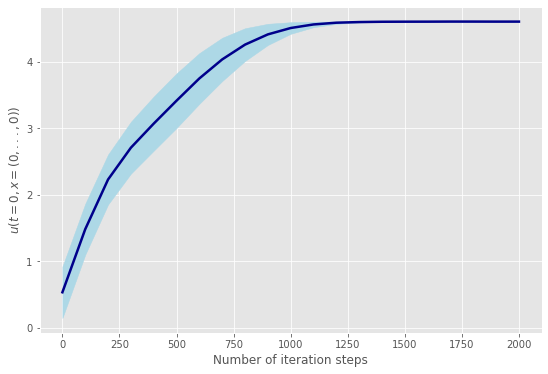

In [444]:
plot_mean_std(HJB_data, ylabel="$u(t=0, x=(0,...,0))$", color1="darkblue", color2="lightblue")

In [445]:
# total execution time for 5 runs (in seconds)
t = total_time_execution_last(filename="hjb_lq_d100_result*.csv")
print("Total execution time for 5 runs (the last one) is : {}s".format(t))

Total execution time for 5 runs (the last one) is : 407s


### Test with different values of lambda for HJB Equation

In [447]:
path = "logs/"
list_HJB_lamb = sorted(glob.glob(path + "hjb_lq_d100_lambda*.csv"))

df = []
for file in list_HJB_lamb:
    read_f = pd.read_csv(file)
    read_f = read_f.drop(['loss_function', 'elapsed_time'], axis=1)
    df.append(read_f)
    
col = ["step"]
HJB_lamb = pd.DataFrame(columns = col)

for file in df:
    HJB_lamb = HJB_lamb.merge(file, on='step', how='outer')

HJB_lamb.columns = ['step','target_value_1', 'target_value_2',
                    'target_value_3', 'target_value_4', 'target_value_5', 'target_value_6']
HJB_lamb.shape

(21, 7)

In [448]:
HJB_lamb.head()

,step,target_value_1,target_value_2,target_value_3,target_value_4,target_value_5,target_value_6
0,0,0.415719,0.139159,0.484225,0.521955,0.626136,0.740045
1,100,1.366440,0.520227,0.749145,0.745451,0.814390,0.911470
2,200,2.125020,0.584797,0.791510,0.779623,0.846459,0.937644
3,300,2.608460,0.672125,0.851840,0.824300,0.885853,0.972302
4,400,2.966760,0.774826,0.926712,0.879223,0.934654,1.014150


In [449]:
HJB_lamb.tail()

,step,target_value_1,target_value_2,target_value_3,target_value_4,target_value_5,target_value_6
16,1600,4.59913,3.12176,2.30420,1.61580,1.44237,1.37007
17,1700,4.60216,3.37690,2.40459,1.65993,1.47179,1.39303
18,1800,4.59987,3.65444,2.51094,1.71177,1.50309,1.41368
19,1900,4.59873,3.91441,2.60139,1.75729,1.52902,1.43942
20,2000,4.60027,4.17131,2.69367,1.79957,1.55470,1.46082


In [450]:
price_MC_hjb = []
for i in np.linspace(0,50,6):
    if i == 0:
        price_MC_hjb.append(MC_HJB(1))
    else:
        price_MC_hjb.append(MC_HJB(i))

print(price_MC_hjb)

col = ['step', 'target_value_1', 'target_value_2',
       'target_value_3', 'target_value_4', 'target_value_5' , 'target_value_6']

price_MC_hjb = [2000] + price_MC_hjb
 
HJB_MC = pd.DataFrame(data=np.array(price_MC_hjb).reshape(-1,len(price_MC_hjb)), columns=col)
HJB_MC

[4.588862439478816, 4.494470181125807, 4.363828390669859, 4.280516504436659, 4.25730506024255, 4.193569628867068]


,step,target_value_1,target_value_2,target_value_3,target_value_4,target_value_5,target_value_6
0,2000.0,4.588862,4.49447,4.363828,4.280517,4.257305,4.19357


In [451]:
def plot_HJB_MC(data1, data2):
    plt.figure(figsize=(9,6))
    xmin, xmax = plt.xlim()
    x = np.linspace(0,50,6)
    
    # Plot the data
    plt.plot(x, data1, "r", marker='o', label="Deep BSDE Solver")
    plt.plot(x, data2, "b", marker='o', label="Monte Carlo Method")
    
    #plt.title(titles)
    plt.xlabel(r'$\lambda$' + ' value', fontsize=14)
    plt.ylabel(r'$u(t=0,x=(0,...,0))$', fontsize=14)
    plt.legend(fontsize=13)

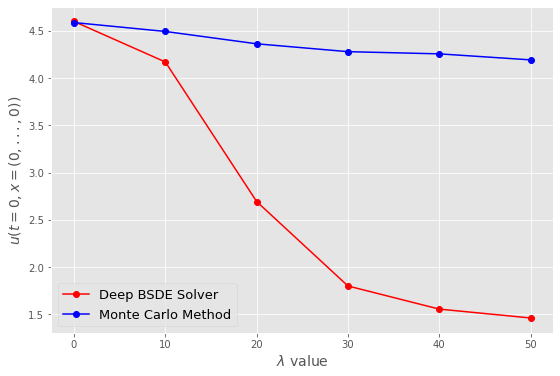

In [452]:
col = ['step', 'target_value_mean', 'target_value_sd']
y = HJB_lamb.iloc[-1, ~HJB_lamb.columns.isin(col)]
mc = HJB_MC.iloc[-1, ~HJB_MC.columns.isin(col)]
plot_HJB_MC(y, mc)

## Study the relative error of HJB Equation with 5 different runs

In [454]:
v_exact = exact_sol_HJB(lamb=1, size=10000)
HJB_relative_error_df = create_dataset_relative_error(filename="hjb_lq_d100_result*.csv", v_exact=v_exact)
HJB_relative_error_df.shape

(21, 8)

In [455]:
HJB_relative_error_df.head()

,step,relative_error_1,relative_error_2,relative_error_3,relative_error_4,relative_error_5,relative_error_mean,relative_error_sd
0,0,0.990201,0.978676,0.845866,0.783493,0.823885,0.884424,0.084156
1,100,0.782794,0.771082,0.639758,0.578218,0.617542,0.677879,0.083331
2,200,0.617792,0.607227,0.477242,0.418563,0.454431,0.515051,0.081812
3,300,0.517285,0.507309,0.372689,0.312751,0.344672,0.410941,0.084961
4,400,0.442374,0.432980,0.293798,0.228958,0.262134,0.332049,0.088699


In [456]:
HJB_relative_error_df.tail()

,step,relative_error_1,relative_error_2,relative_error_3,relative_error_4,relative_error_5,relative_error_mean,relative_error_sd
16,1600,0.001826,0.001994,0.001940,0.002029,0.001694,0.001897,0.000123
17,1700,0.002125,0.002506,0.001750,0.002578,0.001879,0.002168,0.000329
18,1800,0.002262,0.002264,0.002382,0.001918,0.001794,0.002124,0.000227
19,1900,0.001990,0.001850,0.002138,0.002164,0.001955,0.002019,0.000117
20,2000,0.002197,0.002088,0.002206,0.002585,0.001221,0.002059,0.000452


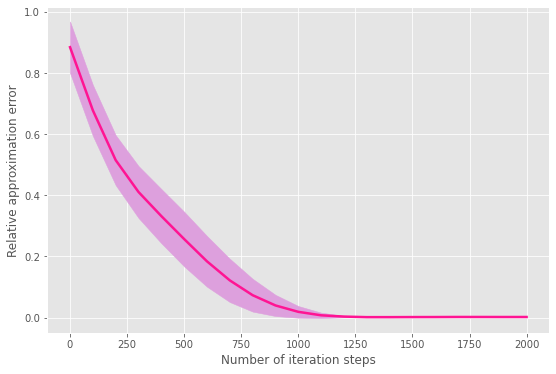

In [457]:
plot_RE_mean_std(HJB_relative_error_df, ylabel="Relative approximation error", color1="deeppink", color2="plum")

# Example 3 :

## Results of Allen-Cahn Equation with 5 different tests independent

In [459]:
AC_data = create_dataset(filename="allencahn_d100_result*.csv")
AC_data.shape

(41, 8)

In [460]:
AC_data.head()

,step,target_value_1,target_value_2,target_value_3,target_value_4,target_value_5,target_value_mean,target_value_sd
0,0,0.461890,0.414772,0.326704,0.358738,0.434122,0.399245,0.049568
1,100,0.413251,0.366440,0.278810,0.310402,0.385704,0.350921,0.049351
2,200,0.368728,0.322369,0.236408,0.267099,0.341643,0.307249,0.048624
3,300,0.327911,0.282373,0.198851,0.228620,0.301225,0.267796,0.047396
4,400,0.290738,0.246461,0.166546,0.194826,0.264677,0.232650,0.045587


In [461]:
AC_data.tail()

,step,target_value_1,target_value_2,target_value_3,target_value_4,target_value_5,target_value_mean,target_value_sd
36,3600,0.052849,0.052881,0.053137,0.053135,0.053006,0.053002,0.000122
37,3700,0.052854,0.052940,0.053136,0.052902,0.053004,0.052967,0.000098
38,3800,0.052806,0.053049,0.053026,0.053064,0.052948,0.052978,0.000095
39,3900,0.052984,0.052902,0.053152,0.053157,0.052879,0.053015,0.000119
40,4000,0.052513,0.052927,0.053155,0.052951,0.052866,0.052883,0.000209


In [462]:
# fonction to calculate the approximation of relative error in the article using means of the branching diffusion method
def relative_error_exact_AC(data, size):
    v_a = data["target_value_mean"].iloc[size-1]
    v_e = 0.0528 # by using means of the branching diﬀusion method, given in article
    return abs(v_a - v_e)/v_e

In [463]:
relative_error_exact_AC(AC_data, size = AC_data.shape[0])

0.0015636363636364083

In [464]:
# total execution time for 5 runs (in seconds)
t = total_time_execution_last(filename="allencahn_d100_result*.csv")
print("Total execution time for 5 runs (the last one) is : {}s".format(t))

Total execution time for 5 runs (the last one) is : 787s


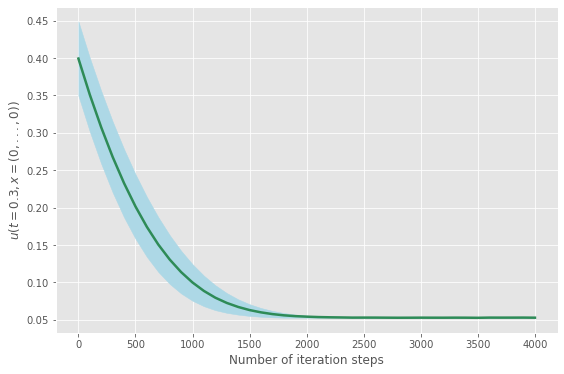

In [465]:
plot_mean_std(AC_data, ylabel="$u(t=0.3, x=(0,...,0))$", color1="seagreen", color2="lightblue")

In [466]:
# Plot the mean and +- sd with different time t
def plot_mean_std_time(data, t=0.3, ylabel="$u(t, x=(0,...,0))$", color1="green"):
    plt.figure(figsize=(9,6))
    xmin, xmax = plt.xlim()
    I = AC_data.shape[0]
    h = t/(I-1)
    x = h*np.arange(0, (I))
    y = data['target_value_mean']
    error = data['target_value_sd']
    plt.plot(x, y, linewidth=3, marker="o", color=color1)
    plt.xlabel('t')
    plt.ylabel(ylabel)

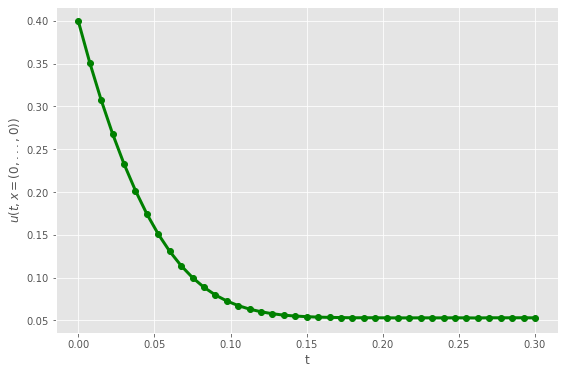

In [467]:
plot_mean_std_time(AC_data)

## Study the relative error of Allen-Cahn Equation with 5 different runs

In [469]:
v_exact = 0.0528 # by using means of the branching diﬀusion method, given in article
AC_relative_error_df = create_dataset_relative_error(filename="allencahn_d100_result*.csv", v_exact=v_exact)
AC_relative_error_df.shape

(41, 8)

In [470]:
AC_relative_error_df.head()

,step,relative_error_1,relative_error_2,relative_error_3,relative_error_4,relative_error_5,relative_error_mean,relative_error_sd
0,0,7.747917,6.855530,5.187576,5.794280,7.222008,6.561462,0.938787
1,100,6.826723,5.940152,4.280492,4.878826,6.305000,5.646239,0.934674
2,200,5.983485,5.105473,3.477424,4.058693,5.470511,4.819117,0.920918
3,300,5.210436,4.347973,2.766117,3.329924,4.705019,4.071894,0.897654
4,400,4.506402,3.667822,2.154280,2.689886,4.012822,3.406242,0.863399


In [471]:
AC_relative_error_df.tail()

,step,relative_error_1,relative_error_2,relative_error_3,relative_error_4,relative_error_5,relative_error_mean,relative_error_sd
36,3600,0.000936,0.001544,0.006384,0.006352,0.003898,0.003823,0.002302
37,3700,0.001019,0.002659,0.006364,0.001932,0.003866,0.003168,0.001850
38,3800,0.000108,0.004712,0.004273,0.004996,0.002811,0.003380,0.001801
39,3900,0.003477,0.001939,0.006672,0.006767,0.001487,0.004069,0.002263
40,4000,0.005432,0.002407,0.006725,0.002866,0.001252,0.003736,0.002025


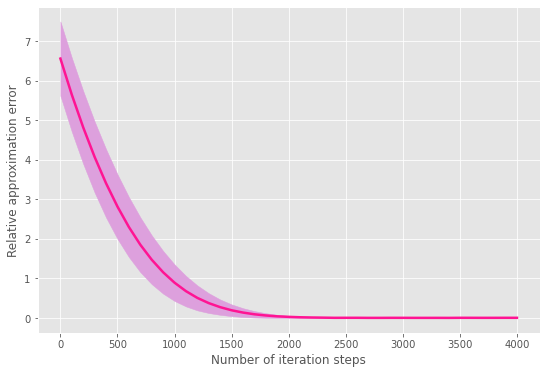

In [472]:
plot_RE_mean_std(AC_relative_error_df, ylabel="Relative approximation error", color1="deeppink", color2="plum")

# Example 4 :

## Pricing of European ﬁnancial derivatives with diﬀerent interest rates for borrowing and lending

### Results of 5 different tests independent

In [474]:
DiffRate_data = create_dataset(filename="pricing_diffrate_d100_result*.csv")
DiffRate_data.shape

(41, 8)

In [475]:
DiffRate_data.head()

,step,target_value_1,target_value_2,target_value_3,target_value_4,target_value_5,target_value_mean,target_value_sd
0,0,15.4576,16.9495,15.1271,16.8318,15.7580,16.02480,0.735538
1,100,15.9431,17.4465,15.6167,17.3025,16.2425,16.51026,0.734303
2,200,16.4096,17.9076,16.0927,17.7712,16.7133,16.97888,0.730783
3,300,16.8584,18.3265,16.5424,18.1934,17.1539,17.41492,0.717795
4,400,17.2833,18.7197,16.9657,18.5820,17.5796,17.82606,0.702223


In [476]:
DiffRate_data.tail()

,step,target_value_1,target_value_2,target_value_3,target_value_4,target_value_5,target_value_mean,target_value_sd
36,3600,21.2385,21.2589,21.2798,21.2670,21.3025,21.26934,0.021329
37,3700,21.2319,21.2785,21.2649,21.1740,21.2901,21.24788,0.041769
38,3800,21.2782,21.2901,21.2383,21.1889,21.3037,21.25984,0.041648
39,3900,21.2582,21.2357,21.2333,21.2244,21.3218,21.25468,0.035360
40,4000,21.2534,21.2204,21.2689,21.2789,21.3377,21.27186,0.038424


In [477]:
# fonction to calculate the approximation of relative error in the article using means of the branching diffusion method
def relative_error_exact_DiffRate(data, size):
    v_a = data["target_value_mean"].iloc[size-1]
    v_e = 21.299 # by using means of the multilevel Picard method, given in article
    return abs(v_a - v_e)/v_e

In [478]:
relative_error_exact_DiffRate(DiffRate_data, size = DiffRate_data.shape[0])

0.0012742382271467804

In [479]:
# total execution time for 5 runs (in seconds)
t = total_time_execution_last(filename="pricing_diffrate_d100_result*.csv")
print("Total execution time for 5 runs (the last one) is : {}s".format(t))

Total execution time for 5 runs (the last one) is : 852s


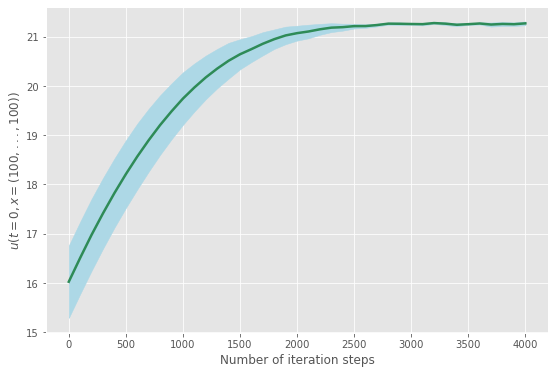

In [480]:
plot_mean_std(DiffRate_data, ylabel="$u(t=0, x=(100,...,100))$", color1="seagreen", color2="lightblue")

### Loss function dataset for DiffRate

In [481]:
def create_dataset_loss(filename):
    path = "logs/"
    list_files = sorted(glob.glob(path + filename))

    df = []
    for file in list_files:
        read_f = pd.read_csv(file)
        read_f = read_f.drop(['target_value', 'elapsed_time'], axis=1)
        df.append(read_f)
    
    col = ["step"]
    data = pd.DataFrame(columns = col)

    for file in df:
        data = data.merge(file, on=['step'], how='outer', suffixes=('_x', '_y'))

    data.columns = ['step','loss_1', 'loss_2',
              'loss_3', 'loss_4', 'loss_5']

    data['loss_mean'] = data.loc[: , data.columns != 'step'].mean(axis=1)
    data['loss_sd'] = data.loc[: , data.columns != 'step'].std(axis=1)

    return data

In [483]:
DiffRate_loss_data = create_dataset_loss(filename="pricing_diffrate_d100_result*.csv")
DiffRate_loss_data.shape

(41, 8)

In [484]:
DiffRate_loss_data.head()

,step,loss_1,loss_2,loss_3,loss_4,loss_5,loss_mean,loss_sd
0,0,67.2343,56.7013,71.2614,50.0893,67.8615,62.62956,7.943398
1,100,61.4333,52.2714,65.5284,45.6765,62.3579,57.45350,7.357280
2,200,56.4770,48.9526,60.5166,41.9672,57.4041,53.06350,6.724119
3,300,52.0737,46.2505,56.2584,38.9023,53.3224,49.36146,6.159305
4,400,48.2786,44.0141,52.6942,36.3887,49.7245,46.22002,5.656060


In [485]:
DiffRate_loss_data.tail()

,step,loss_1,loss_2,loss_3,loss_4,loss_5,loss_mean,loss_sd
36,3600,31.6545,37.6328,37.5512,27.6331,33.8136,33.65704,3.776074
37,3700,31.6380,37.6059,37.5509,27.7625,33.8192,33.67530,3.731016
38,3800,31.6076,37.5816,37.5331,27.8104,33.8076,33.66806,3.710296
39,3900,31.6436,37.5927,37.5967,27.8183,33.7761,33.68548,3.719282
40,4000,31.6986,37.6492,37.6874,27.8609,33.5728,33.69378,3.731279


In [486]:
# Plot the mean and +- sd of loss function
def plot_mean_std_loss(data, ylabel="$u(t=0, x=(100,...,100))$", color1="r", color2="lightsalmon"):
    plt.figure(figsize=(9,6))
    xmin, xmax = plt.xlim()
    x = data['step']
    y = data['loss_mean']
    error = data['loss_sd']
    plt.plot(x, y, linewidth=2.5, color=color1)
    plt.fill_between(x, y-error, y+error, color=color2)
    plt.xlabel('Number of iteration steps')
    plt.ylabel(ylabel)

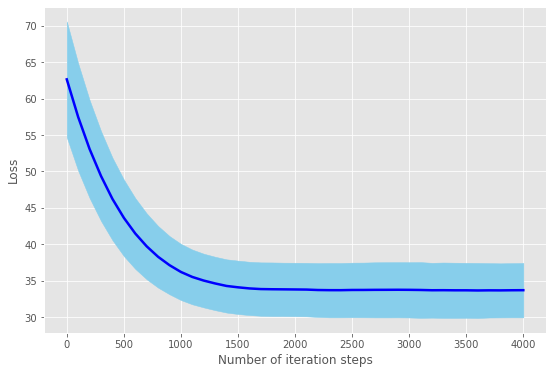

In [487]:
plot_mean_std_loss(DiffRate_loss_data, ylabel="Loss", color1="blue", color2="skyblue")

## Study the relative error of Diff-Rate Equation with 5 different runs

In [489]:
v_exact = 21.299 # by using means of the multilevel Picard method, given in article
DiffRate_relative_error_df = create_dataset_relative_error(filename="pricing_diffrate_d100_result*.csv", v_exact=v_exact)
DiffRate_relative_error_df.shape

(41, 8)

In [490]:
DiffRate_relative_error_df.head()

,step,relative_error_1,relative_error_2,relative_error_3,relative_error_4,relative_error_5,relative_error_mean,relative_error_sd
0,0,0.274257,0.204211,0.289774,0.209738,0.260153,0.247627,0.034534
1,100,0.251463,0.180877,0.266787,0.187638,0.237406,0.224834,0.034476
2,200,0.229560,0.159228,0.244439,0.165632,0.215301,0.202832,0.034311
3,300,0.208489,0.139561,0.223325,0.145810,0.194615,0.182360,0.033701
4,400,0.188539,0.121100,0.203451,0.127565,0.174628,0.163056,0.032970


In [491]:
DiffRate_relative_error_df.tail()

,step,relative_error_1,relative_error_2,relative_error_3,relative_error_4,relative_error_5,relative_error_mean,relative_error_sd
36,3600,0.002841,0.001883,0.000901,0.001502,0.000164,0.001458,0.000903
37,3700,0.003150,0.000962,0.001601,0.005869,0.000418,0.002400,0.001961
38,3800,0.000977,0.000418,0.002850,0.005169,0.000221,0.001927,0.001868
39,3900,0.001916,0.002972,0.003085,0.003503,0.001070,0.002509,0.000889
40,4000,0.002141,0.003690,0.001413,0.000944,0.001817,0.002001,0.000935


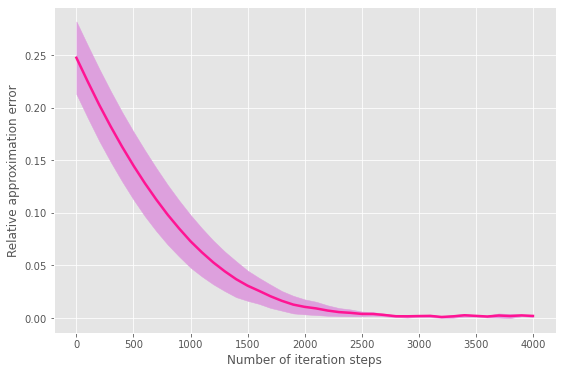

In [492]:
plot_RE_mean_std(DiffRate_relative_error_df, ylabel="Relative approximation error", color1="deeppink", color2="plum")